In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from tqdm.notebook import tqdm
from umap import UMAP
from sklearn import model_selection, ensemble
from xgboost import XGBClassifier,XGBRegressor

%matplotlib inline

C:\anaconda3\envs\torch\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\anaconda3\envs\torch\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\anaconda3\envs\torch\lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword 

In [2]:
df=pd.read_csv('datasets/data.csv')
df[['q_mu', 'q_nu1', 'q_nu2', 'e_nu_1', 'e_nu_2']]

,q_mu,q_nu1,q_nu2,e_nu_1,e_nu_2
0,0.550377,0.164911,0.008094,0.01904,0.17794
1,0.564295,0.167629,0.006639,0.01672,0.20868
2,0.564179,0.164110,0.007052,0.01337,0.20442
3,0.573555,0.167174,0.006663,0.01637,0.18453
4,0.569296,0.169658,0.006823,0.01783,0.11478
...,...,...,...,...,...
184845,0.566484,0.172819,0.008164,0.02085,0.25589
184846,0.572031,0.170474,0.007907,0.01592,0.23668
184847,0.569204,0.173147,0.007366,0.01590,0.24216
184848,0.570114,0.168854,0.007378,0.01384,0.24447


In [3]:
df['e_mu_current']

0         0.01298
1         0.01283
2         0.01268
3         0.01129
4         0.01169
           ...   
184845    0.00842
184846    0.00971
184847    0.00886
184848    0.00868
184849    0.00937
Name: e_mu_current, Length: 184850, dtype: float64

In [59]:
X=[]
Y=[]
x_df=np.log(df[['q_mu', 'q_nu1', 'q_nu2', 'e_nu_1', 'e_nu_2']].values)
y_df=df['e_mu_current'].values

for i in range(len(df)-2):
    X.append(x_df[i:i+2].flatten())
    Y.append(y_df[i+2])

X=np.array(X)
Y=np.array(Y)

In [60]:
X.shape

(184848, 10)

In [61]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    Y,
                                                                    test_size=0.2, random_state=42)

In [62]:
# regr = ensemble.RandomForestRegressor(max_depth=30, random_state=0)
regr= XGBRegressor(max_depth=15, learning_rate=1)

regr.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

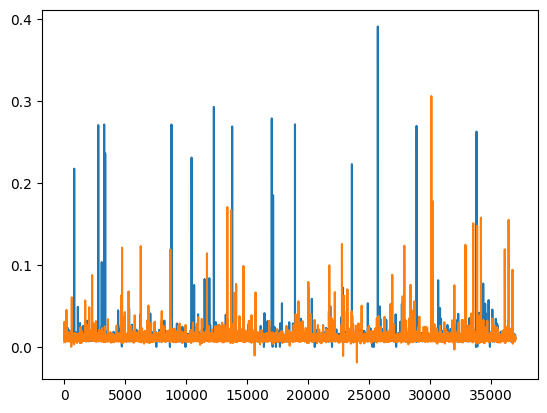

In [64]:
res=regr.predict(x_test)

# plt.plot(abs(y_test-res))
plt.plot(y_test)
plt.plot(res)


In [54]:
y_test[0]

0.01184

In [56]:
x_test[0]

array([0.55344982, 0.15667513, 0.00781341, 0.01752   , 0.10051   ,
       0.55950148, 0.17459737, 0.00732289, 0.02047   , 0.17158   ])